In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import random
import matplotlib.pyplot as plt
# import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_lfw_pairs
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn import preprocessing
import sklearn.linear_model as lm
from sklearn.decomposition import PCA

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4)

In [27]:
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("Image shape: (%d, %d)" % (h, w))

Total dataset size:
n_samples: 3023
n_features: 1850
n_classes: 62
Image shape: (50, 37)


In [28]:
def print_dataset_info(lfw_people):
    n_samples, h, w = lfw_people.images.shape

    X = lfw_people.data
    n_features = X.shape[1]

    y = lfw_people.target
    target_names = lfw_people.target_names
    n_classes = target_names.shape[0]

    print("Total dataset size:")
    print("n_samples:", n_samples)
    print("n_features:", n_features)
    print("n_classes:", n_classes)
    print("Image shape:", (h, w))


# LOGISTIC REGRESSION (PCA)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
param_grid = {
    'C': [0.001, 0.1, 0.01, 1, 10],
    'max_iter': [100, 200, 700, 1000]
}

lrl2_cv = make_pipeline(
    preprocessing.StandardScaler(),
    GridSearchCV(lm.LogisticRegression(class_weight='balanced',
                                       fit_intercept=False, multi_class='ovr'),
                 param_grid,cv=3))


In [32]:
t0 = time()
lrl2_cv.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

done in 4938.766s


In [33]:
best_params = lrl2_cv.named_steps['gridsearchcv'].best_params_
print("The best model:\n", best_params)

The best model:
 {'C': 0.001, 'max_iter': 100}


In [34]:
y_pred = lrl2_cv.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.67      0.50      0.57         8
             Alvaro Uribe       0.33      0.67      0.44         3
          Amelie Mauresmo       1.00      0.67      0.80         3
             Andre Agassi       0.25      0.25      0.25         4
           Angelina Jolie       0.00      0.00      0.00         2
             Ariel Sharon       0.80      0.67      0.73         6
    Arnold Schwarzenegger       0.00      0.00      0.00         6
     Atal Bihari Vajpayee       1.00      0.67      0.80         3
             Bill Clinton       0.67      0.80      0.73         5
             Carlos Menem       0.50      0.67      0.57         3
             Colin Powell       0.96      0.69      0.81        36
            David Beckham       0.33      0.50      0.40         2
          Donald Rumsfeld       0.82      0.60      0.69        15
         George Robertson       0.60      1.00      0.75     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [36]:
def show_misclassified_images(X_test, y_test, y_pred, target_names, image_shape= (50, 37), num_images_to_show=10):
    misclassified_indices = np.where(y_test != y_pred)[0]

    misclassified_images = X_test[misclassified_indices]
    misclassified_true_labels = y_test[misclassified_indices]
    misclassified_pred_labels = y_pred[misclassified_indices]

    num_misclassified = len(misclassified_indices)
    print(f'Total misclassified images: {num_misclassified}')

    num_images_to_display = min(num_misclassified, num_images_to_show)

    fig, axes = plt.subplots(2, num_images_to_display // 2, figsize=(12, 6))
    fig.subplots_adjust(wspace=0.4, hspace=0.4)

    for i, ax in enumerate(axes.flat):
        ax.imshow(misclassified_images[i].reshape(image_shape), cmap='gray')
        true_label_name = target_names[misclassified_true_labels[i]]
        pred_label_name = target_names[misclassified_pred_labels[i]]
        ax.set_title(f'True: {true_label_name}\nPredicted: {pred_label_name}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

Total misclassified images: 118


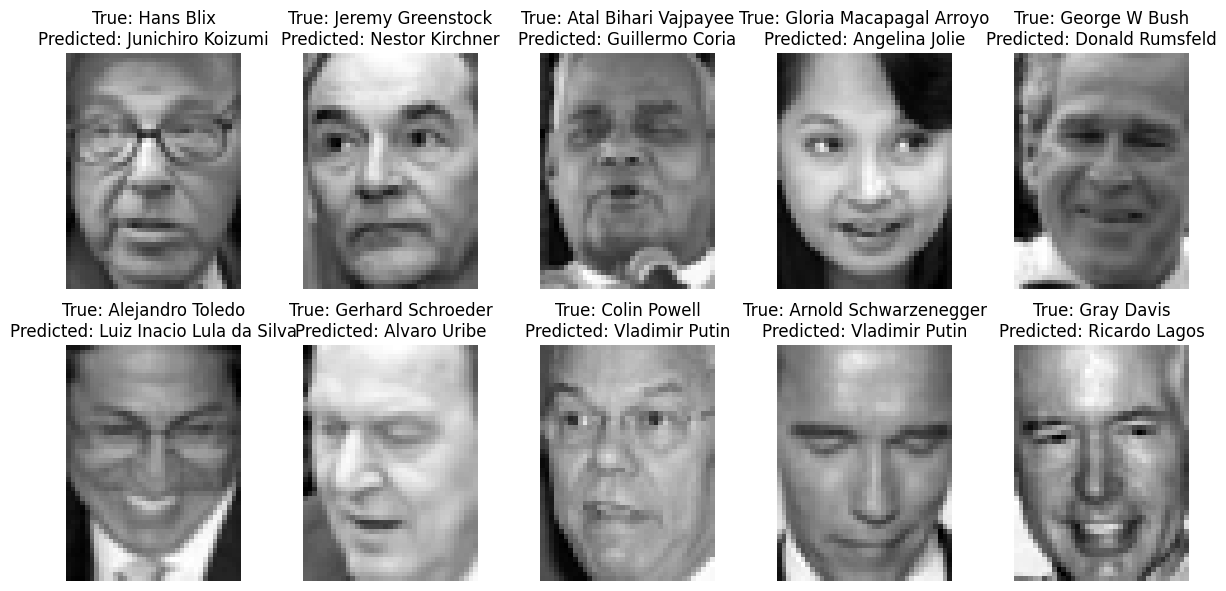

In [37]:
show_misclassified_images(X_test, y_test, y_pred, target_names)

# PCA with LogisticRegression with L2 regularization

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [39]:
# pca_lrl2_cv = make_pipeline(
#     PCA(svd_solver='randomized', whiten=True),
#     GridSearchCV(
#         LogisticRegression(class_weight='balanced', fit_intercept=False, max_iter=200, penalty='l2'),
#         param_grid={
#             'pca__n_components': [100, 150, 200],
#             'logisticregression__C': 10. ** np.arange(-4, 4)
#         },
#         cv=3, n_jobs=1
#     )
# )


In [40]:
# Correct pipeline setup
pipeline = make_pipeline(
    PCA(svd_solver='randomized', whiten=True),
    LogisticRegression(class_weight='balanced', fit_intercept=False, max_iter=800, penalty='l2')
)

param_grid = {
    'pca__n_components': [150],
    'logisticregression__C': [1]
}

pca_lrl2_cv = GridSearchCV(pipeline, param_grid=param_grid, cv=3, n_jobs=1)


In [41]:
t0 = time()
pca_lrl2_cv.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

done in 6.583s


In [42]:
print("Best parameters:", pca_lrl2_cv.best_params_)

Best parameters: {'logisticregression__C': 1, 'pca__n_components': 150}


In [43]:
y_pred = pca_lrl2_cv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.67      0.50      0.57         8
             Alvaro Uribe       0.50      0.67      0.57         3
          Amelie Mauresmo       0.67      0.67      0.67         3
             Andre Agassi       0.50      0.25      0.33         4
           Angelina Jolie       0.00      0.00      0.00         2
             Ariel Sharon       0.43      0.50      0.46         6
    Arnold Schwarzenegger       0.33      0.17      0.22         6
     Atal Bihari Vajpayee       1.00      0.67      0.80         3
             Bill Clinton       0.60      0.60      0.60         5
             Carlos Menem       0.50      0.67      0.57         3
             Colin Powell       0.88      0.78      0.82        36
            David Beckham       0.25      0.50      0.33         2
          Donald Rumsfeld       0.53      0.53      0.53        15
         George Robertson       0.60      1.00      0.75     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Total misclassified images: 131


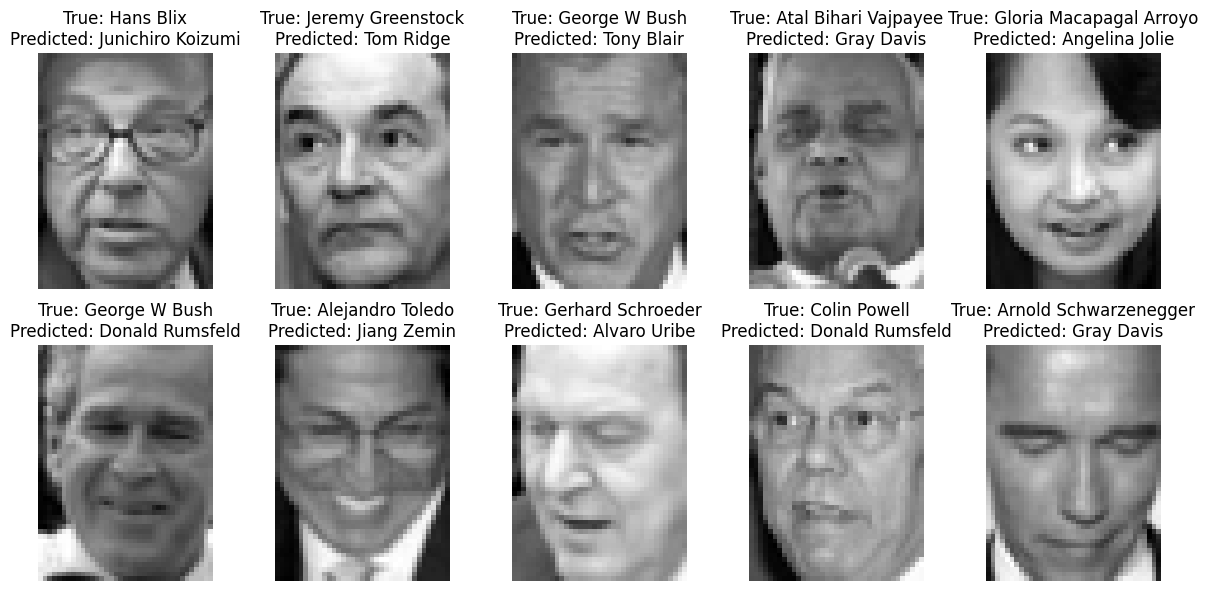

In [44]:
show_misclassified_images(X_test, y_test, y_pred, target_names)